In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


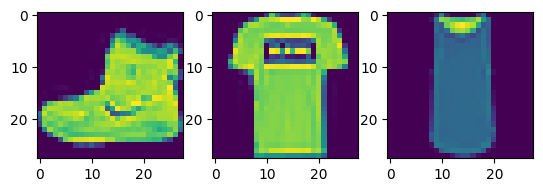

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
plt.show()

In [7]:
print(train_labels[:3])

[9 0 0]


In [9]:
train_images, test_images = train_images /255, test_images/ 255

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.25)

Epoch 1/10
704/704 [==============================] - 6s 7ms/step - loss: 0.5952 - accuracy: 0.7942 - val_loss: 0.4420 - val_accuracy: 0.8416
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 0.4493 - accuracy: 0.8396 - val_loss: 0.4307 - val_accuracy: 0.8486
Epoch 3/10
704/704 [==============================] - 5s 8ms/step - loss: 0.4028 - accuracy: 0.8542 - val_loss: 0.3768 - val_accuracy: 0.8615
Epoch 4/10
704/704 [==============================] - 9s 12ms/step - loss: 0.3779 - accuracy: 0.8605 - val_loss: 0.3710 - val_accuracy: 0.8619
Epoch 5/10
704/704 [==============================] - 8s 11ms/step - loss: 0.3615 - accuracy: 0.8661 - val_loss: 0.3494 - val_accuracy: 0.8725
Epoch 6/10
704/704 [==============================] - 10s 14ms/step - loss: 0.3467 - accuracy: 0.8708 - val_loss: 0.3327 - val_accuracy: 0.8774
Epoch 7/10
704/704 [==============================] - 7s 10ms/step - loss: 0.3347 - accuracy: 0.8755 - val_loss: 0.3320 - val_accuracy: 0.8819
E

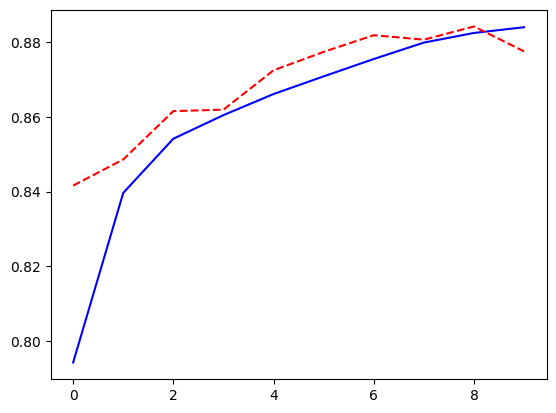

In [14]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')


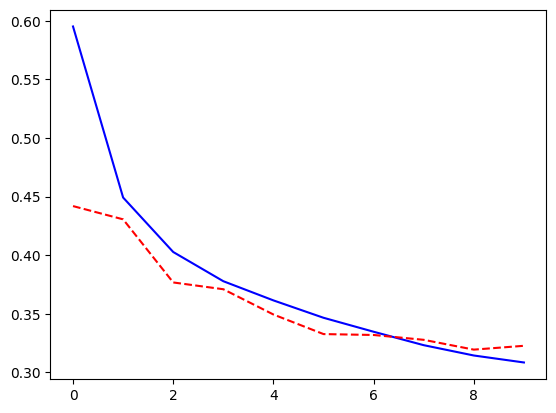

In [16]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3511 - accuracy: 0.8738 - 526ms/epoch - 2ms/step
테스트 정확도: 0.8737999796867371


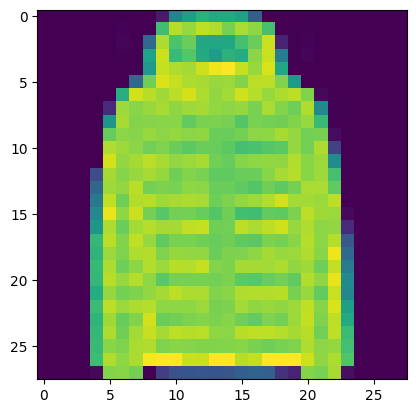

In [22]:
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [24]:
print(test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]
print(new_image.shape)

yhat = model.predict(new_image)
print(yhat.round(3))

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 365ms/step
[[0.    0.    0.058 0.003 0.935 0.    0.003 0.    0.001 0.   ]]


In [27]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis, :,:]))
yhat

1/1 [==============================] - 0s 23ms/step


4

In [28]:
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
class_names[yhat]

'Coat'

In [30]:
def plot_images(images, labels, images_per_row=5):
    n_images = len(images)
    n_rows = (n_images-1) // images_per_row +1
    fig, ax = plt.subplots(n_rows, images_per_row, figsize = (images_per_row*2, n_rows*2))

    for i in range(n_rows):
        for j in range(images_per_row):
            if i*images_per_row + j >= n_images: break
            img_idx = i*images_per_row + j
            a_image = images[img_idx].reshape(28,28)
            if n_rows>1: axis = ax[i,j]
            else: axis = ax[j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            label = class_names[labels[img_idx]]
            axis.set_title(label)
            axis.imshow(a_image, interpolation='nearest')
            


1/1 [==============================] - 0s 36ms/step
[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0 2 7 7 5 1]


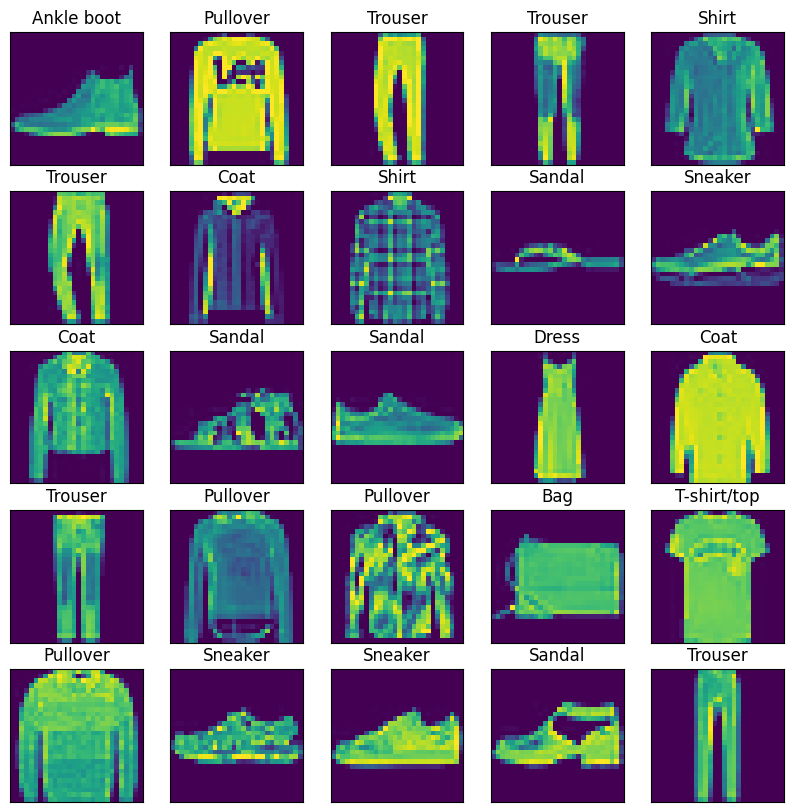

In [31]:
images = test_images[:25]
predictions = np.argmax(model.predict(images), axis= 1)
print(predictions)
plot_images(images, predictions, images_per_row =5)